## TODO Recording (exploration):

- First show the workspace open
- Show the left navigation pane
- Click on the drop down to show that we have the 3 databricks environments (Data Science and Engineering, SQL, and ML)
- Click on Experiments - should be empty
- Click on Feature Store - should be empty
- Click on Models - should be empty

## TODO Recording (cluster, DBFS enabling, import notebook):

- Start with the Databricks workspace open (no cluster created)
- Go to Compute to create a cluster
- Create a single node cluster (loony-cluster)
- Select the Databricks ML runtime to install on the cluster (the latest production, non GPU version)
- Create the cluster

- Click on Data on the left navigation pane
- Show that DBFS is not enabled
- Go to Admin Console -> Workspace settings -> Enable DBFS
- Click on Data in the left navigation pane and select the DBFS tab and show we can now access DBFS
- Go to Data -> DBFS -> FileStore ->datasets Upload store.csv( Note that we will create a folder datasets inside File Store)

- Now on the left navigation pane go to Workspace -> cloud.user@loonycorn.com -> Import notebook and import a cleaned up version of this notebook
- We will have the code already in the notebook, please remove all comments and markdown, and also clear the output

##### IMPORTANT Recording tip: Use Ctrl + Enter to run the code, this will help prevent the UI jump that happens when a code cell is run

In [0]:
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Loading the data
displaying the first 5 rows of the dataset

Dataset link-
https://www.kaggle.com/irisfanfan/store-data?select=Store.csv

sample function will display the random rows from the dataset, bydefault it will display 1, and also number of rows we can pass it as parameter

In [0]:
store_revenue = pd.read_csv('/dbfs/FileStore/datasets/store.csv')

store_revenue.sample(10)

,revenue,reach,local_tv,online,instore,person,event
273,15010.45,5,28285.48,1085,2419,5,cobranding
866,52461.44,3,33717.75,1592,2244,15,cobranding
588,28858.32,4,31757.17,1596,3183,9,cobranding
840,30985.25,3,NaN,1379,2808,11,special
833,40021.64,2,27621.35,1659,4088,12,non_event
559,31418.35,6,37108.20,1927,1554,9,special
850,37920.19,2,34399.40,934,1892,10,non_event
573,28368.63,3,NaN,1412,3771,10,non_event
122,60993.85,3,34942.70,2331,4398,14,non_event
367,46358.31,3,31850.85,1851,3409,14,special


Checking the number of rows and columns

In [0]:
store_revenue.shape

Out[7]: (985, 7)

Checking the total number of NULL values present in each columns

In [0]:
store_revenue.isnull().sum()

Out[8]: revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

Dropping the NULL values and After dropping the NULL values from the dataset again cross checking the total NULL values in each columns

In [0]:
store_revenue = store_revenue.dropna()

sum(store_revenue.isnull().sum())

Out[9]: 0

After deleting NULL values or unwanted columns again checking the number rows and columns present in the datatset

In [0]:
store_revenue.shape

Out[10]: (929, 7)

Summary statistics of whole dataset is obtained

In [0]:
store_revenue.describe()

,revenue,reach,local_tv,online,instore,person
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,38475.476652,3.399354,31324.061109,1595.045210,3374.162540,11.052745
std,11747.868177,1.016480,3970.934733,502.666035,979.219476,3.065101
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30327.080000,3.000000,28733.830000,1250.000000,2727.000000,9.000000
50%,38432.780000,3.000000,31104.520000,1595.000000,3394.000000,11.000000
75%,45901.750000,4.000000,33972.410000,1921.000000,4036.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


Correlation matrix is obtained using corr() method

In [0]:
store_revenue.corr()

,revenue,reach,local_tv,online,instore,person
revenue,1.000000,-0.165286,0.602114,0.174198,0.307361,0.557475
reach,-0.165286,1.000000,-0.034039,-0.033271,0.036588,0.057563
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664
online,0.174198,-0.033271,0.006775,1.000000,-0.020198,0.035069
instore,0.307361,0.036588,-0.046825,-0.020198,1.000000,-0.008875
person,0.557475,0.057563,0.048664,0.035069,-0.008875,1.000000


Checking the same correlation matrix  above  using heatmap

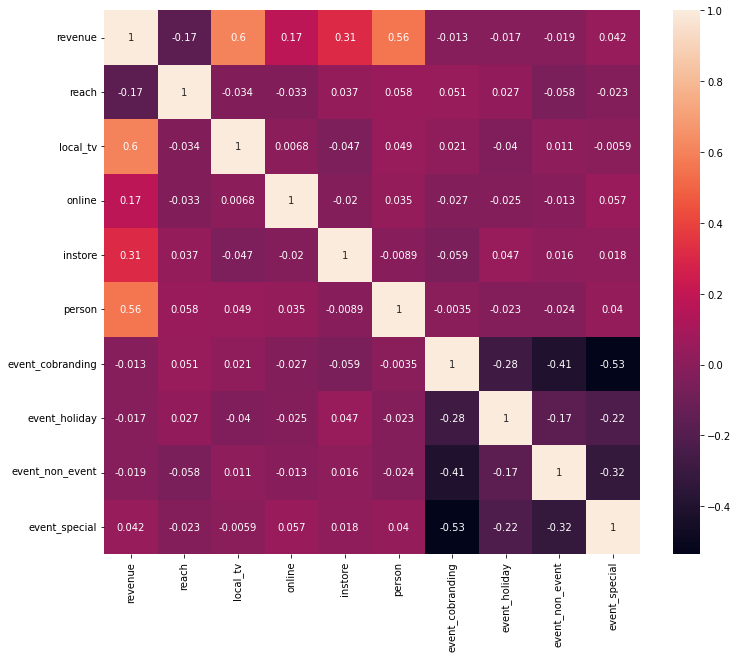

In [0]:
fig1, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(store_revenue.corr(), annot = True)

plt.show()

We know that event values are not numeric, so we need to convert the event columns in to numeric column which we will do later.

In [0]:
store_revenue['event'].unique()

Out[14]: array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

Obtaining  revenue under these four types of event

special event earned the most revenue averagely
cobranding is the most frequent event

In [0]:
store_revenue.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,38288.119016,11979.348536,7146.99,30444.2750,37907.490,46327.7400,79342.07
holiday,96.0,37871.494896,12021.835993,5000.00,29722.5775,38299.100,46234.7875,73377.15
non_event,182.0,38029.054396,11210.926875,6874.43,29988.5650,38073.755,44634.6725,69429.39
special,275.0,39237.940545,11704.709265,10207.96,31385.3850,39553.130,46136.6350,71757.50


Event wise revenue breakdown using barplot

Out[16]: <AxesSubplot:xlabel='event', ylabel='revenue'>

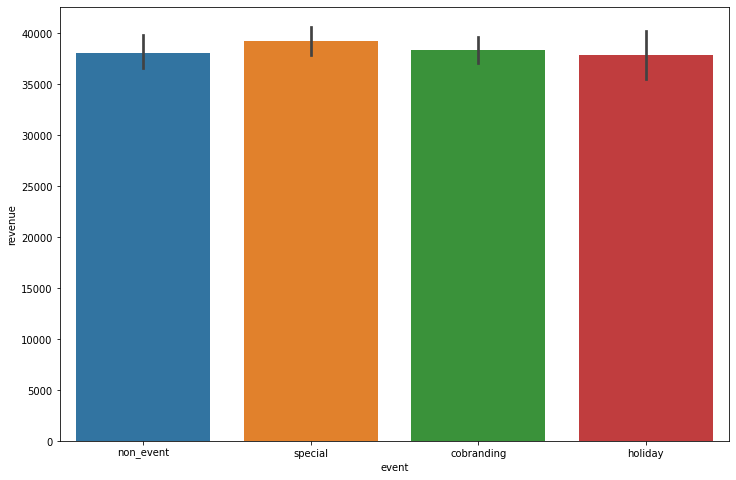

In [0]:
fig2, ax = plt.subplots(figsize = (12, 8))

sns.barplot(x = 'event', y = 'revenue', data = store_revenue)

Visualising Relationships using Scatter plot. As observed above..Positive correlation is observed between investment in local ads and Revenue

Out[17]: Text(0, 0.5, 'Overall_Revenue')

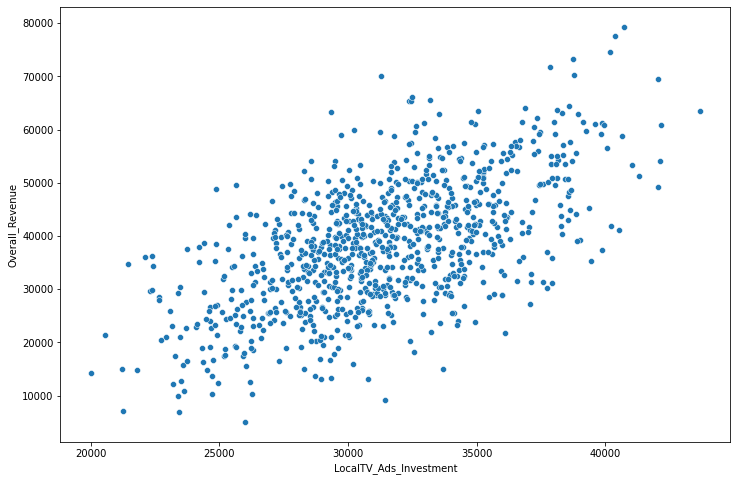

In [0]:
fig3, ax = plt.subplots(figsize = (12, 8))

sns.scatterplot(x = 'local_tv', y = 'revenue', data = store_revenue )

plt.xlabel('LocalTV_Ads_Investment')
plt.ylabel('Overall_Revenue')

Converting catergorical values in to Numerical values

In [0]:
store_revenue = pd.get_dummies(store_revenue, columns = ['event'])

store_revenue.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,45860.28,2,31694.91,2115,3296,8,0,0,1,0
1,63588.23,2,35040.17,1826,2501,14,0,0,0,1
2,23272.69,4,30992.82,1851,2524,6,0,0,0,1
3,45911.23,2,29417.78,2437,3049,12,0,0,0,1
4,36644.23,2,35611.11,1122,1142,13,1,0,0,0


### TODO Recording

- For introducing mlflow, we will create an workspace experiment using UI.
- Click on Experiments in left navigation pane and then from dropdown, click on Blank experiment to create experiment.
- Name of the experiment is set as store_revenue_prediction.

https://learn.microsoft.com/en-gb/azure/databricks/mlflow/tracking#--experiments

We can introduce mlflow by setting our created workspace experiment to log all runs therafter.Experiments can also be seen by clicking on the Flask in the header menu.

In [0]:
mlflow.set_experiment(experiment_name = '/Users/cloud.user@loonycorn.com/store_revenue_prediction')

Out[21]: <Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/3133413903371221', experiment_id='3133413903371221', lifecycle_stage='active', name='/Users/cloud.user@loonycorn.com/store_revenue_prediction', tags={'mlflow.experiment.sourceName': '/Users/cloud.user@loonycorn.com/store_revenue_prediction',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'cloud.user@loonycorn.com',
 'mlflow.ownerId': '1980623222278766'}>

- We can log our figures as artifacts in our run for  Mlflow experiment.
- Click on view run detail boxed arrow on right side and click on Artifacts section. 
- Click on the artifacts and show that they are our plots
- Note that some random name is being given to this run.

In [0]:
mlflow.start_run()
mlflow.log_figure(fig1, 'corrplot_heatmap.png')
mlflow.log_figure(fig2, 'barplot_revenue_event_wise.png')
mlflow.log_figure(fig3, 'localtvads_revenue.png')
mlflow.end_run()

Splitting the data for test and train.Note that We are converting Predictors df as Float type to avoid warnings related to missing data

In [0]:
X = store_revenue.drop('revenue', axis = 1)
y = store_revenue['revenue']
X = X.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Out[24]: ((743, 9), (186, 9), (743,), (186,))

By the below box plot we can  see that our numeric columns are in very different ranges of values before scaling

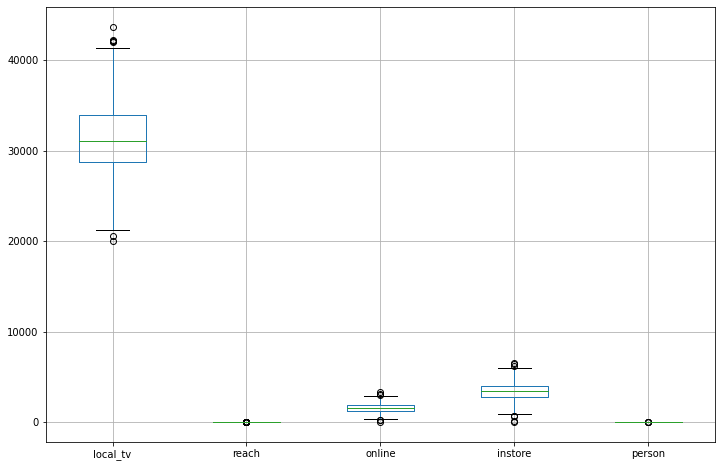

In [0]:
store_revenue.boxplot(column = ['local_tv', 'reach', 'online', 'instore', 'person'], figsize = (12, 8))

plt.show()


Separate datasets are made for numerical and categorical columns before performing Scaling

In [0]:
numerical_data = ['reach', 'local_tv', 'online', 'instore', 'person']
categorical_data = ['event_cobranding', 'event_holiday', 'event_non_event', 'event_special']

X_train_numerical = X_train[numerical_data]
X_test_numerical = X_test[numerical_data]

X_train_numerical.head()

,reach,local_tv,online,instore,person
316,5.0,29888.86,1974.0,1891.0,9.0
796,3.0,29585.68,1189.0,3304.0,13.0
63,2.0,32687.14,2732.0,2181.0,9.0
714,3.0,29982.31,1988.0,4973.0,10.0
478,4.0,29494.04,2002.0,4200.0,11.0


In [0]:
X_train_categorical = X_train[categorical_data]
X_test_categorical = X_test[categorical_data]

X_train_categorical.head()

,event_cobranding,event_holiday,event_non_event,event_special
316,0.0,0.0,1.0,0.0
796,0.0,1.0,0.0,0.0
63,0.0,0.0,1.0,0.0
714,1.0,0.0,0.0,0.0
478,1.0,0.0,0.0,0.0


Here we are scaling our  columns of separate dataframe which is  made up of  numerical columns from training set and scaling columns of  separate dataframe which is made up of numerical columns from test set(using the same mean, stddev from the training set)

In [0]:
scaler = StandardScaler()

X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), 
                                 columns = X_train_numerical.columns)

X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical),
                                columns = X_test_numerical.columns)

Combining our scaled numeric columns with our one-hot-encoded categorical columns( only the training dataset)

In [0]:
X_train_categorical.reset_index(drop = True, inplace = True)
X_train_numerical.reset_index(drop = True, inplace = True)

X_train = pd.concat([X_train_numerical, X_train_categorical], axis = 1)

X_train.head()

,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,1.552441,-0.369242,0.749687,-1.524322,-0.668705,0.0,0.0,1.0,0.0
1,-0.376428,-0.445313,-0.828391,-0.086664,0.631093,0.0,1.0,0.0,0.0
2,-1.340862,0.332869,2.273488,-1.229261,-0.668705,0.0,0.0,1.0,0.0
3,-0.376428,-0.345795,0.777831,1.611461,-0.343755,1.0,0.0,0.0,0.0
4,0.588006,-0.468306,0.805975,0.824972,-0.018806,1.0,0.0,0.0,0.0


Combining our scaled numeric columns with our one-hot-encoded categorical columns( only the testing dataset)

In [0]:
X_test_categorical.reset_index(drop = True, inplace = True)
X_test_numerical.reset_index(drop = True, inplace = True)

X_test = pd.concat([X_test_numerical, X_test_categorical], axis = 1)

X_test.head()

,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
0,1.552441,0.385221,1.756843,-0.136519,0.631093,0.0,0.0,1.0,0.0
1,1.552441,0.500727,-0.372055,0.487178,-0.993654,0.0,0.0,0.0,1.0
2,1.552441,-0.997883,-0.148913,-0.970829,1.280992,0.0,0.0,0.0,1.0
3,0.588006,1.107827,-0.896741,-0.685943,0.306143,0.0,0.0,0.0,1.0
4,-0.376428,-1.270696,0.675306,-0.711379,-0.668705,1.0,0.0,0.0,0.0


Post scaling, The numerical variables distributions can be seen in more or less same range

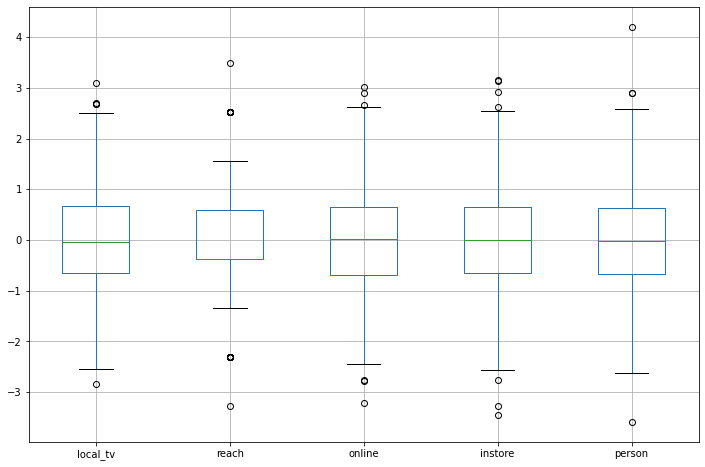

In [0]:
X_train.boxplot(column = ['local_tv', 'reach', 'online', 'instore', 'person'], figsize = (12, 8))

plt.show()

We are enabling autologging of parameters and metrics. All training parameters and training metrics are autologged.

Fitting the model into training data. Here The run remains open throughout the with statement, and is automatically closed when the statement exits, even if it exits due to an exception.We are specifying run name for linear_regression_model so that random name is not given.

https://learn.microsoft.com/en-gb/azure/databricks/mlflow/databricks-autologging

Understanding the artifacts in the ML model
https://www.mlflow.org/docs/latest/models.html

In [0]:
mlflow.sklearn.autolog()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

with mlflow.start_run(run_name = 'linear_regression_model') as run1:

      lr = LinearRegression()
      lr.fit(X_train, y_train)

      y_pred =  lr.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run1 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run1.info.run_id))

Active run_id: 2fcf96afe47c4fe69a2816ae439857b0


## TODO Recording

- Open up the run for linear regression in a new tab (click on 1 run in the results)
- Click through and show each detail in the run Parameters, Metrics, Tags, Artifacts
- In the Artifacts - click on each artifact and show the contents
- Close the tab with the run

Running one more run this time using Randomforest Regressor on same training data.

In [0]:
with mlflow.start_run(run_name = 'randomforest_regression_model') as run2:
      rf = RandomForestRegressor()
      rf.fit(X_train, y_train)

      y_pred =  rf.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run2 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run2.info.run_id))

Active run_id: 786e1e1654434c048f63164b2e6d97a5


## TODO Recording

- Open up the run for random forest in a new tab  (click on 1 run in the results)
- Click through and show each detail in the run Parameters, Metrics
- Close the tab with the run

In [0]:
with mlflow.start_run(run_name = 'knn_regression_model') as run3:
      knn = KNeighborsRegressor()
      knn.fit(X_train, y_train)
      
      y_pred =  knn.predict(X_test)
      
      testing_score = r2_score(y_test, y_pred)
      mean_absolute_score = mean_absolute_error(y_test, y_pred)
      mean_sq_error = mean_squared_error(y_test, y_pred)
      
      run3 = mlflow.active_run()
      
      print('Active run_id: {}'.format(run3.info.run_id))

Active run_id: cdff20b3bd9344f1a0bf492516b5ca86


## TODO Recording

- Open up the run for KNN in a new tab  (click on 1 run in the results)
- Click through and show each detail in the run Parameters, Metrics
- Close the tab with the run

## TODO Recording

- Open up the Experiment Runs sidebar to see the MLflow runs. 
- Click on Date next to the down arrow to display a menu, and select r2_score_X_Test to display the runs sorted by the R2 score metric
- The the best R2 is for linear regression model

# TODO Recording
MLflow tracks the parameters and performance metrics of each run. 

- Click the External Link icon  at the top of the Experiment Runs sidebar to navigate to the MLflow Runs Table.
- Clicking on three runs we can compare three runs, We can see that for both RandomForest and KNN Regressor, the model is overfitting. 
- Remove the parameters "bootstrap" and "ccp_alpha"
- Add the metric r2_score_X_test

Best metrics can be seen for Linear Regression model

In [0]:
run1.info.run_id

Out[38]: '2fcf96afe47c4fe69a2816ae439857b0'

In [0]:
run_id1 = run1.info.run_id
model_uri = 'runs:/' + run_id1 + '/model'

In [0]:
import mlflow.sklearn

model = mlflow.sklearn.load_model(model_uri = model_uri)

model.coef_

Out[40]: array([-2280.39369148,  6787.2010622 ,  1650.2234452 ,  4192.16805257,
        6250.6670496 ,   187.68623538,   510.4137645 ,  -748.89582888,
          50.795829  ])

Obtaining predictions for test data

In [0]:
y_pred = model.predict(X_test)

y_pred

Out[41]: array([43083.01833941, 33612.40450612, 31915.11082095, 42273.03924711,
       24859.84795931, 48959.28136966, 37146.91779982, 30170.82331234,
       36885.24894653, 40214.65631313, 59332.21152135, 54694.40772127,
       30188.44970859, 49749.07167889,  5389.41926509, 21297.29900513,
       43663.36301187, 35210.98868979, 30814.71769084, 44682.83297275,
       25949.30591465, 28152.51094813, 48539.90152888, 23136.08819291,
       14857.3039233 , 40660.77125708, 26382.18748393, 22876.56055999,
       59083.686197  , 50107.01767985, 46014.69633312, 27413.05447335,
       28018.27105662, 29965.62276427, 47119.72675791, 21319.747057  ,
       27012.84033421, 29205.10049979, 50767.44649211, 31703.29457514,
       48108.18659272, 30308.32199107, 36767.60766195, 41995.51103132,
       39857.6300178 , 23753.39145379, 34007.39144102, 40739.11999452,
       36970.57346196, 34777.20430113, 28989.82657819, 37423.93950523,
       44939.3884114 , 18807.79685054, 40122.8041316 , 41302.5976287

The loaded model should match the original

In [0]:
predictions_loaded = model.predict(X_test)
predictions_original = lr.predict(X_test)
 
assert(np.array_equal(predictions_loaded, predictions_original))

Creating  the PySpark UDF.

In [0]:
import mlflow.pyfunc

pyfunc_udf = mlflow.pyfunc.spark_udf(spark, model_uri = model_uri, env_manager = 'conda')

2022/11/08 04:16:40 INFO mlflow.pyfunc: This UDF will use Conda to recreate the model's software environment for inference. This may take extra time during execution.
2022/11/08 04:16:40 INFO mlflow.models.cli: Selected backend for flavor 'python_function'
2022/11/08 04:16:43 INFO mlflow.utils.conda: === Creating conda environment /local_disk0/.ephemeral_nfs/repl_tmp_data/ReplId-5eb1a-42649-6d4f6-5/mlflow/envs/conda_envs/mlflow-29f0468bcb318cd30eb8ea14564c3b6e0854c4dd-ba3b602dd54fcf1ce9313d1c86b7ac89cc834639 ===
2022/11/08 04:18:28 INFO mlflow.pyfunc.backend: === Running command 'source /databricks/conda/bin/../etc/profile.d/conda.sh && conda activate mlflow-29f0468bcb318cd30eb8ea14564c3b6e0854c4dd-ba3b602dd54fcf1ce9313d1c86b7ac89cc834639 1>&2 && python -c ""'


Spark dataframe is created for Test data

In [0]:
X_test_sp = spark.createDataFrame(X_test)

Predictions are obtained and are same as predictions made earlier

In [0]:
from pyspark.sql.functions import struct
 
predicted_df = X_test_sp.withColumn('prediction', pyfunc_udf(struct(*(X_test.columns.tolist()))))
display(predicted_df)

reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special,prediction
1.5524405000114037,0.38522139349357143,1.7568430008401934,-0.13651917078492878,0.6310927996176402,0.0,0.0,1.0,0.0,43083.018339411574
1.5524405000114037,0.5007270596359962,-0.3720553895709335,0.4871781932142379,-0.993654082280858,0.0,0.0,0.0,1.0,33612.40450612018
1.5524405000114037,-0.9978833724168078,-0.14891306536353488,-0.9708288583531453,1.2809915523770394,0.0,0.0,0.0,1.0,31915.110820953887
0.5880063097869279,1.1078274503275862,-0.8967413951396814,-0.6859426235737542,0.3061434232379405,0.0,0.0,0.0,1.0,42273.039247108536
-0.3764278804375478,-1.2706960384245394,0.6753063303574869,-0.7113788945361998,-0.6687047059011584,1.0,0.0,0.0,0.0,24859.84795931005
-1.3408620706620236,0.9411866592588519,0.3154642039329432,-0.15686818755488527,0.3061434232379405,0.0,0.0,1.0,0.0,48959.281369660275
1.5524405000114037,-0.34111817982181497,0.01392052257159379,-0.6594889017728108,1.2809915523770394,0.0,0.0,1.0,0.0,37146.91779982064
0.5880063097869279,0.4877651334647846,0.01392052257159379,-0.5048363743211414,-1.3186034586605577,0.0,0.0,0.0,1.0,30170.82331234087
-1.3408620706620236,-0.8158142259421921,-0.028295592818995127,0.7211918860687376,-0.34375532952145876,0.0,0.0,0.0,1.0,36885.24894653063
-0.3764278804375478,0.670238242408151,-0.12076898843647561,1.5758505904069107,-1.6435528350402573,1.0,0.0,0.0,0.0,40214.6563131306
